<a href="https://colab.research.google.com/github/Danielewicz-code/Credit-approval/blob/main/credit_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import  LabelEncoder


from sklearn.linear_model import LogisticRegression

This dataset comprises 20 customer-related features and holds the potential for predicting whether a customer is eligible for credit approval.

In [3]:
#we bring the data
data = pd.read_csv('credit_customers.csv')

# Data visualization

In [ ]:
#shape of the data set
data.shape

(1000, 21)

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'credit_amount'}>,
        <Axes: title={'center': 'installment_commitment'}>],
       [<Axes: title={'center': 'residence_since'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'existing_credits'}>],
       [<Axes: title={'center': 'num_dependents'}>, <Axes: >, <Axes: >]],
      dtype=object)

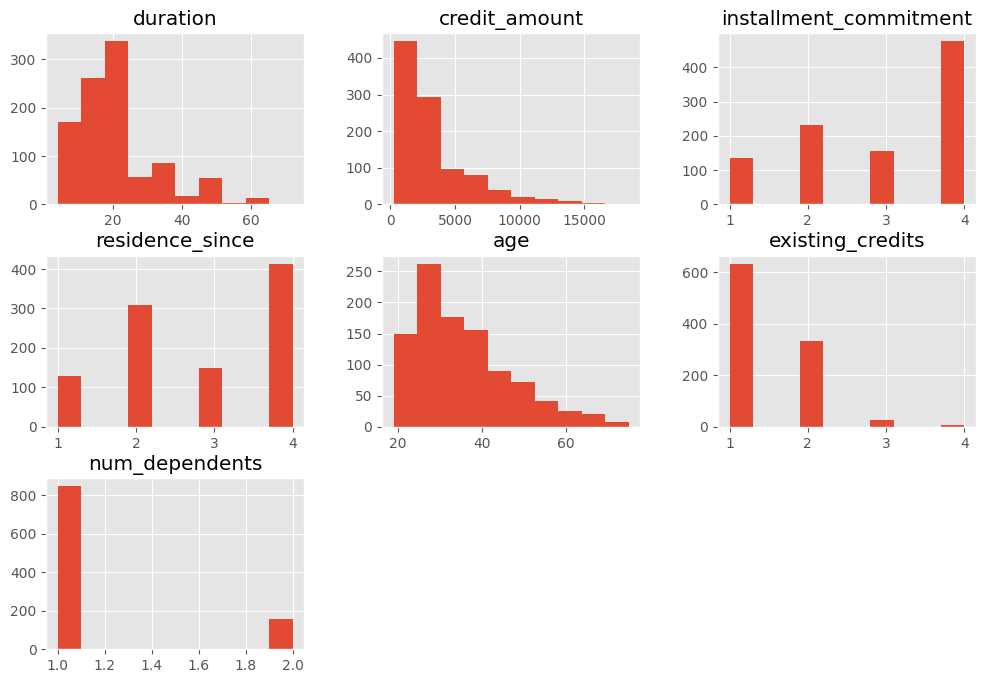

In [8]:
#histogram of the df
data.hist(figsize= (12, 8))

In [5]:
#technical information about the df (data frame)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [9]:
#see if there is any missing values in the df
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [ ]:
data.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


<ipython-input-12-4ddfe71d5e9b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


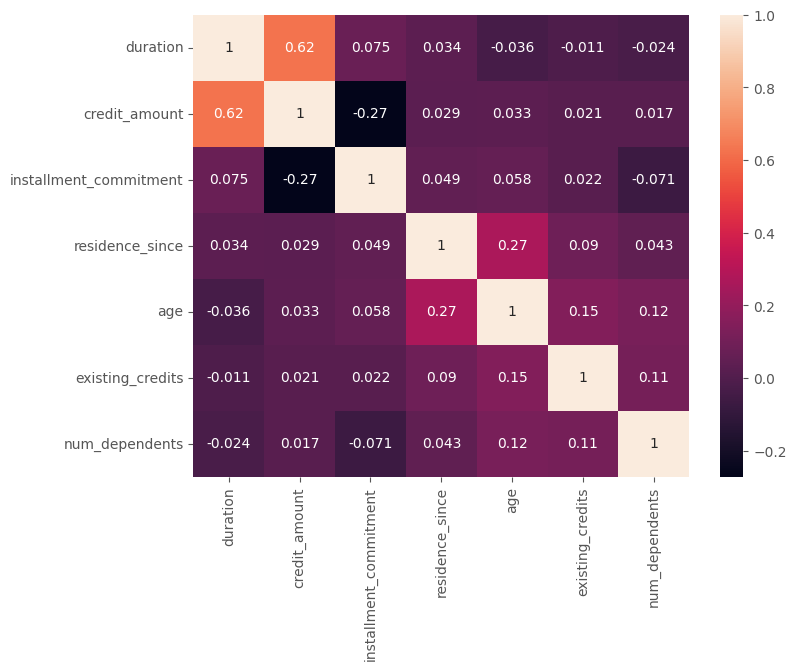

In [ ]:
#correlation matrix
plt.figure(figsize= (8, 6))

corr = data.corr()

sns.heatmap(corr, annot= True)

plt.show()

In [ ]:
#with this loop we can see the features that have less or 2 chacacteristics

print("this features have less than two characteristics:")
for i in data:
  if data[i].nunique() <= 2:
    print(i, data[i].nunique())

this features have less than two characteristics:
num_dependents 2
own_telephone 2
foreign_worker 2
class 2


In [ ]:
#here we check the ones that have more that 3 characteristics, with this we get a better idea of the dataset so following this i´m gonna reflect a little
print("this features have more than two characteristics:")
for i in data:
  if data[i].nunique() > 2:
    print(i, data[i].nunique())

this features have more than two characteristics:
checking_status 4
duration 33
credit_history 5
purpose 10
credit_amount 921
savings_status 5
employment 5
installment_commitment 4
personal_status 4
other_parties 3
residence_since 4
property_magnitude 4
age 53
other_payment_plans 3
housing 3
existing_credits 4
job 4


1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64


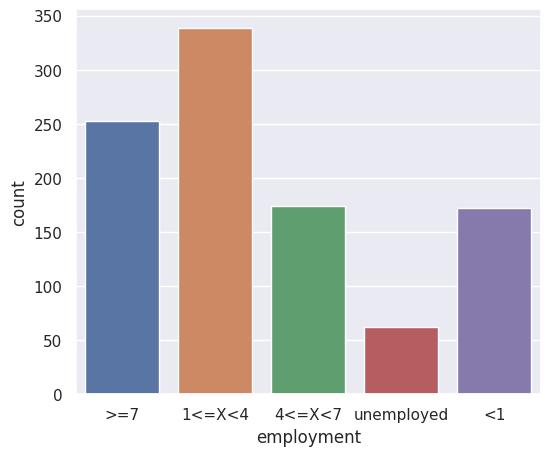

In [ ]:
#here im seeing a feature that caught my eye
print(data.employment.value_counts())

plt.figure(figsize= (6,5))

sns.set_theme(style= 'darkgrid')

ax = sns.countplot(data= data, x= 'employment')

plt.show()

We can clearly see that we have many features that have more than one chacacteristic and added to this we have lots of objects that will need to be binarized, the other thing is that there are some values like "employment" that have strange information so im gonna check every feature and only then i'll decide what to do.

In [ ]:
#with this pice of code we can see every unique value for all the objects
for column in data:
  if data[column].dtype == 'object':
    unique_values = data[column].unique()
    print(f'{column} : {unique_values}\n')

checking_status : ['<0' '0<=X<200' 'no checking' '>=200']

credit_history : ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']

purpose : ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']

savings_status : ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']

employment : ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']

personal_status : ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']

other_parties : ['none' 'guarantor' 'co applicant']

property_magnitude : ['real estate' 'life insurance' 'no known property' 'car']

other_payment_plans : ['none' 'bank' 'stores']

housing : ['own' 'for free' 'rent']

job : ['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']

own_telephone : ['yes' 'none']

foreign_worker : ['yes' 'no']

class : ['good' 'bad']



we can see many features that have a strange pattern, im gonna try to figure them out and then apply the changes to make them more readable

# Data Cleaning

In [ ]:
#first of all i´m gonna deal with apparently "confusing values" that are strange to read, this obviously based on my interpretation.


#employment value
mapping= {'1<=X<4': '1 to 4 years',
          '>=7' :  '7 or more years',
          '4<=X<7' : 'from 4 to 7 years',
          '<1' : 'less than a year',
          'unemployed': 'unemployed'}


data['employment'] = data['employment'].replace(mapping)

In [ ]:
#checking_status
mapping= {'<0': 'negative balance',
          '0<=X<200': 'low balance',
          'no checking': 'no checking',
          '>=200': 'high balance'}

data['checking_status'] = data['checking_status'].replace(mapping)

In [ ]:
#savings_status

mapping = {'no known savings': 'no known savings',
           '<100': 'more than 100 dolars',
           '500<=X<1000': '500 to 1000',
           '>=1000': 'more than 1000',
           '100<=X<500': '100 to 500'}

data['savings_status'] = data['savings_status'].replace(mapping)

In [ ]:
for column in data:
  if data[column].dtype == 'object':
    data_unique = data[column].unique()
    print(f'{column} : {data_unique}\n')

checking_status : ['negative balance' 'low balance' 'no checking' 'high balance']

credit_history : ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']

purpose : ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']

savings_status : ['no known savings' 'more than 100 dolars' '500 to 1000' 'more than 1000'
 '100 to 500']

employment : ['7 or more years' '1 to 4 years' 'from 4 to 7 years' 'unemployed'
 'less than a year']

personal_status : ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']

other_parties : ['none' 'guarantor' 'co applicant']

property_magnitude : ['real estate' 'life insurance' 'no known property' 'car']

other_payment_plans : ['none' 'bank' 'stores']

housing : ['own' 'for free' 'rent']

job : ['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']

own_telephone : ['yes' 'none']

foreign_w

now we can see the df more clearly

In [ ]:
#here we visualize the unique ages
age = data['age'].unique()

age_ac = np.sort(age)

print(age_ac)

[19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 70. 74. 75.]


im thinking about creating some batches for the ages so we can have a df that is more accurate.

In [ ]:
bins = [19, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

labels = ['19-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']

#here we replace the ages with those grups, we use rigth=false so the right part doesn´t get the cut.
data['age_grups'] = pd.cut(data['age'], bins= bins, labels= labels, right= False)


In [ ]:
data.drop('age', axis= 1, inplace= True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   object  
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   object  
 3   purpose                 1000 non-null   object  
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   object  
 6   employment              1000 non-null   object  
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   object  
 9   other_parties           1000 non-null   object  
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   object  
 12  other_payment_plans     1000 non-null   object  
 13  housing                 1000 non-null   object  
 14  existing_credits        1

The thing is we´ll need to apply one hot encoding or (binarize) the new ages, even, this is way better, we only have 12 values in contrast with the past one that had over 50, this is better for logistic regresion.

In [ ]:
#standard scaler

scaler = StandardScaler()

num_val = ['duration', 'credit_amount', 'installment_commitment', 'residence_since',
                    'existing_credits', 'num_dependents']


data[num_val] = scaler.fit_transform(data[num_val])

We are almost there, now i´m gonna **encode all the objects**, including of course the new age grup.

In [ ]:
#label encoding the objects
encoder= LabelEncoder()

encode = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment',
                  'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans',
                  'housing', 'job', 'own_telephone', 'foreign_worker', 'class', 'age_grups']


for feature in encode:
  data[feature] = encoder.fit_transform(data[feature])

print('encoding completed')

encoding completed


In [ ]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,age_grups
0,2,-1.236478,1,6,-0.745131,4,1,0.918477,3,2,...,3,1,1,1.027079,1,-0.428290,1,1,1,9
1,1,2.248194,3,6,0.949817,2,0,-0.870183,0,2,...,3,1,1,-0.704926,1,-0.428290,0,1,0,0
2,3,-0.738668,1,2,-0.416562,2,2,-0.870183,3,2,...,3,1,1,-0.704926,3,2.334869,0,1,1,5
3,2,1.750384,3,3,1.634247,2,2,-0.870183,3,1,...,1,1,0,-0.704926,1,2.334869,0,1,1,5
4,2,0.256953,2,4,0.566664,2,0,0.024147,3,2,...,2,1,0,1.027079,1,2.334869,0,1,0,6


In [ ]:
#now im just gonna drop irrelevant data
data.drop(['other_parties', 'residence_since', 'job', 'num_dependents', 'own_telephone', 'foreign_worker',
           'personal_status', 'property_magnitude', 'other_payment_plans', 'purpose'], axis= 1, inplace= True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int64  
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int64  
 3   credit_amount           1000 non-null   float64
 4   savings_status          1000 non-null   int64  
 5   employment              1000 non-null   int64  
 6   installment_commitment  1000 non-null   float64
 7   housing                 1000 non-null   int64  
 8   existing_credits        1000 non-null   float64
 9   class                   1000 non-null   int64  
 10  age_grups               1000 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 86.1 KB


In [ ]:
#checking if we will need to use stratify to balance the distribution, here we can se we do need it.
data_class = data['class'].value_counts()

print(data_class)

1    700
0    300
Name: class, dtype: int64


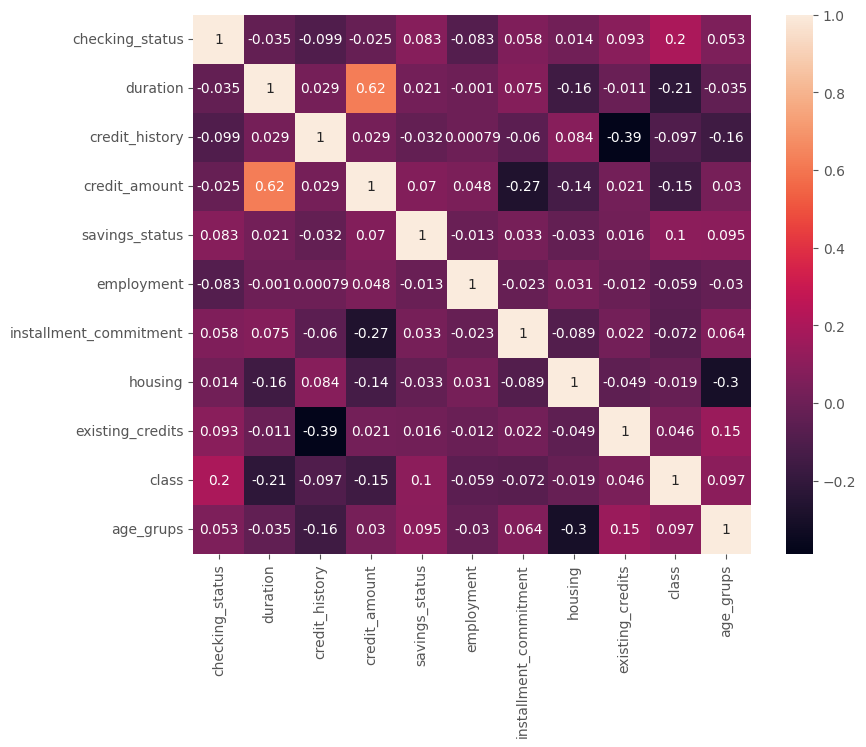

In [ ]:
plt.figure(figsize= (9,7))

corr = data.corr()

sns.heatmap(corr, annot= True)

plt.show()

### **Now we are ready**

# Creating the model

### I'm going to use a Gaussian Discriminant Algorithm. This algorithm will focus more on the training samples and learn more effectively.

In [ ]:
#GDA

#bring the data
X = data.drop('class', axis= 1)
Y = data['class']

#split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify= Y, random_state= 69)

print('train and test split successful.')

train and test split successful.


In [ ]:
from imblearn.over_sampling import RandomOverSampler
#we use this for oversampling the minority class in an imbalanced dataset as this one.

ros = RandomOverSampler(random_state=0)
X_train_resampled, Y_train_resampled = ros.fit_resample(X_train, Y_train)

In [ ]:
#gda model

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train_resampled, Y_train_resampled)

predict = model.predict(X_test)

prediction= accuracy_score(Y_test, predict)



In [ ]:
train_score = model.score(X_train_resampled, Y_train_resampled)
test_score= model.score(X_test, Y_test)

X_pred = model.predict(X_test)

cm = confusion_matrix(X_pred, Y_test)

print(f'this is the train score: {train_score}')
print(f'this is the test score: {test_score}')
print('this is the cunfusion matrix:')
print(cm)

this is the train score: 0.6616071428571428
this is the test score: 0.73
this is the cunfusion matrix:
[[ 33  27]
 [ 27 113]]


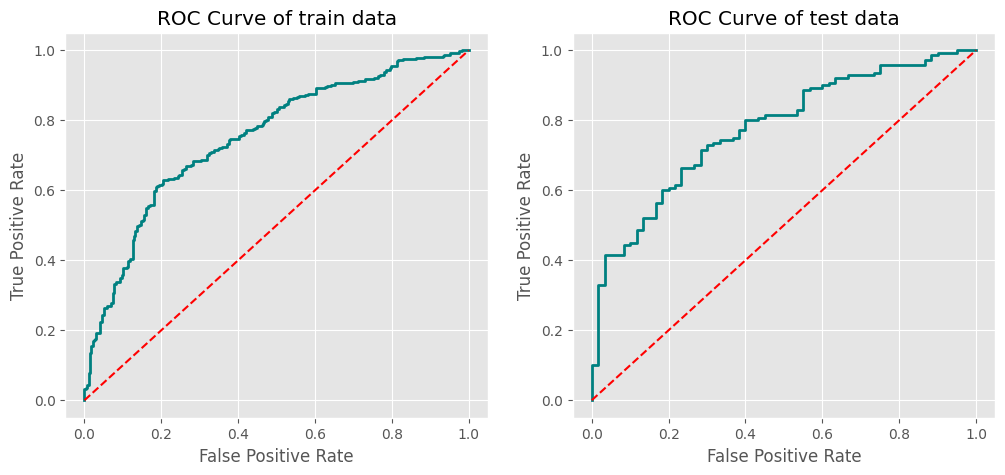

In [ ]:
# predict probabilities for both train and test data
y_train_pred_prob = model.predict_proba(X_train_resampled)[:, 1]
y_test_pred_prob = model.predict_proba(X_test)[:, 1]

# calculate ROC curve for train and test data
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train_resampled, y_train_pred_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, y_test_pred_prob)

# create subplots to display ROC curves
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# plot ROC curve for train data
plt.sca(axes[0])
plt.plot(fpr_train, tpr_train, linewidth=2, color='teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of train data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# plot ROC curve for test data
plt.sca(axes[1])
plt.plot(fpr_test, tpr_test, linewidth=2, color='teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the plot
plt.show()